# Plot fluxinvm*

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import f90nml
from read_f90 import read_parameters, read_time # In-house module for GKV-diag outputs

### GKV parameters from gkvp_header.f90 ###
global_nv=read_parameters("../src/gkvp_header.f90", "global_nv", int)
global_nm=read_parameters("../src/gkvp_header.f90", "global_nm", int)

### GKV parameters from gkvp_namelist ###

nml=f90nml.read("../gkvp_namelist.001")
#print(nml)
dtout_fxv=nml["times"]["dtout_fxv"]

print("global_nv =",global_nv)
print("global_nm =",global_nm)
print("dtout_fxv =",dtout_fxv)

global_nv = 24
global_nm = 15
dtout_fxv = 10.0


In [44]:
### Load data of fluxinvm_z* ###
filelist=sorted(glob.glob("./data/fluxinvm_z*dat"))

# Time
t=[]
for f in filelist:
    wt=read_time(f)
    t.append(wt)
t=np.array(t)
print("t =",t)

# Coordinates: vl, mu, vp
data=np.loadtxt(filelist[0]) # Ascii data
data=data.reshape(global_nm+1,2*global_nv,5)
vl=data[0,:,0]
mu=data[:,0,1]
vp=data[:,0,2]
print("vl =",vl)
print("mu =",mu)    
print("vp =",vp)    

# Values from mominxy*
flux_es=[]
for f in filelist:
    data=np.loadtxt(f) # Ascii data
    data=data.reshape(global_nm+1,2*global_nv,5)
#     vl=data[:,:,0]
#     mu=data[:,:,1]
#     vp=data[:,:,2]
#     reflux_es=data[:,:,3]
#     imflux_es=data[:,:,4]
    flux_es.append(data[:,:,3]+1j*data[:,:,4])
    
flux_es=np.array(flux_es)
print(flux_es.shape)

t = [28.2]
vl = [-4.5        -4.308511   -4.117021   -3.925532   -3.734043   -3.542553
 -3.351064   -3.159574   -2.968085   -2.776596   -2.585106   -2.393617
 -2.202128   -2.010638   -1.819149   -1.62766    -1.43617    -1.244681
 -1.053191   -0.8617021  -0.6702128  -0.4787234  -0.287234   -0.09574468
  0.09574468  0.287234    0.4787234   0.6702128   0.8617021   1.053191
  1.244681    1.43617     1.62766     1.819149    2.010638    2.202128
  2.393617    2.585106    2.776596    2.968085    3.159574    3.351064
  3.542553    3.734043    3.925532    4.117021    4.308511    4.5       ]
mu = [ 0.     0.045  0.18   0.405  0.72   1.125  1.62   2.205  2.88   3.645
  4.5    5.445  6.48   7.605  8.82  10.125]
vp = [0.        0.2716616 0.5433231 0.8149847 1.086646  1.358308  1.629969
 1.901631  2.173292  2.444954  2.716616  2.988277  3.259939  3.5316
 3.803262  4.074923 ]
(1, 16, 48)


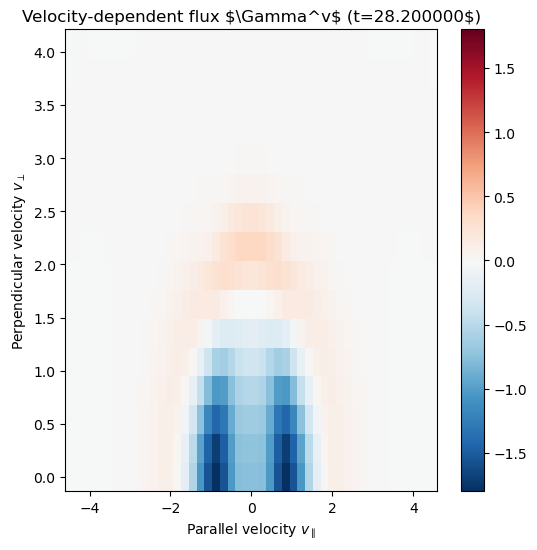

In [47]:
it=len(t)-1
# Flux
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title(r"Velocity-dependent flux $\Gamma^v$ "+"(t={:f}$)".format(t[it]))
ax.set_xlabel(r"Parallel velocity $v_\parallel$")
ax.set_ylabel(r"Perpendicular velocity $v_\perp$")
vmax=np.max([np.abs(flux_es.real.min()),flux_es.real.max()])
quad = ax.pcolormesh(vl,vp,flux_es[it,:,:].real,
                     cmap='RdBu_r',shading="auto",vmax=vmax,vmin=-vmax)
plt.axis('tight') # 見やすさを優先するときは、このコマンドを有効にする
fig.colorbar(quad)
plt.show()

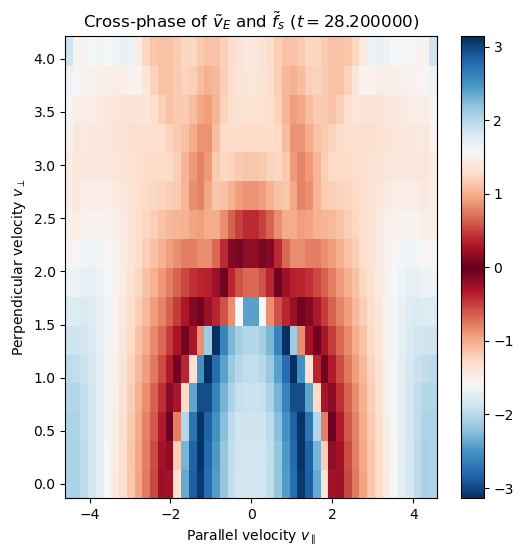

In [48]:
import matplotlib.colors as mcolors
# combine two colormap and build a new colormap
colors1 = plt.cm.RdBu_r(np.linspace(0., 1, 128))
colors2 = plt.cm.RdBu(np.linspace(0, 1, 128))
combined_colors = np.vstack((colors1, colors2))
new_cmap = mcolors.LinearSegmentedColormap.from_list('combined_cmap', combined_colors)

it=len(t)-1
# Cross-phase between ExB flow and distribution function
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title(r"Cross-phase of $\tilde{v}_E$ and $\tilde{f}_s$ "+"($t={:f}$)".format(t[it]))
ax.set_xlabel(r"Parallel velocity $v_\parallel$")
ax.set_ylabel(r"Perpendicular velocity $v_\perp$")
vmax=np.pi
quad = ax.pcolormesh(vl,vp,np.angle(flux_es[it,:,:]),
                     cmap=new_cmap,shading="auto",vmax=vmax,vmin=-vmax)
plt.axis('tight') # 見やすさを優先するときは、このコマンドを有効にする
fig.colorbar(quad)
plt.show()